In [1]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=755332cae2e10ca835614ce7536b2372abd7d98b8d19eb43d12dfe4aee5046f0
  Stored in directory: c:\users\alldmd\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=f0cdba2241015ae8eb19f677347544a69145f65d39357113ad9a2d1bb91b0548
  Stored in directory: c:\users\alldmd\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8423 sha256=d089e354a13a4385957945ac1927067b07cf30a6b835bdbb5761680ac27875e5
  Stored in directory: C:\Users\Alldmd\AppData\Local\Temp\pip-ephem-wheel-cache-6gzo2o37\wheels\e5\79\d7\03ee900b85115c0e28de92b75e95d4ac278274277a16d04e68
Successfully built mpl-finance
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date
from matplotlib.dates import date2num
from matplotlib import pyplot as plt
from mpl_finance import candlestick_ohlc

In [19]:
#Выбираем период
start = datetime.datetime(2020,3,1)
end = datetime.datetime(2020,6,30) 
#Выбираем компании
first_company = 'KO' #Coca-cola
second_company = 'PEP' #Pepsi


KO = yf.download(first_company,start, end)
PEP = yf.download(second_company, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
# Подготавливаем данные
KO.reset_index(inplace=True)
KO.drop(['Adj Close', 'Volume'], 1, inplace=True)
KO['Date'] = KO['Date'].apply(lambda x: date2num(x))

PEP.reset_index(inplace=True)
PEP.drop(['Adj Close', 'Volume'], 1, inplace=True)
PEP['Date'] = PEP['Date'].apply(lambda x: date2num(x))

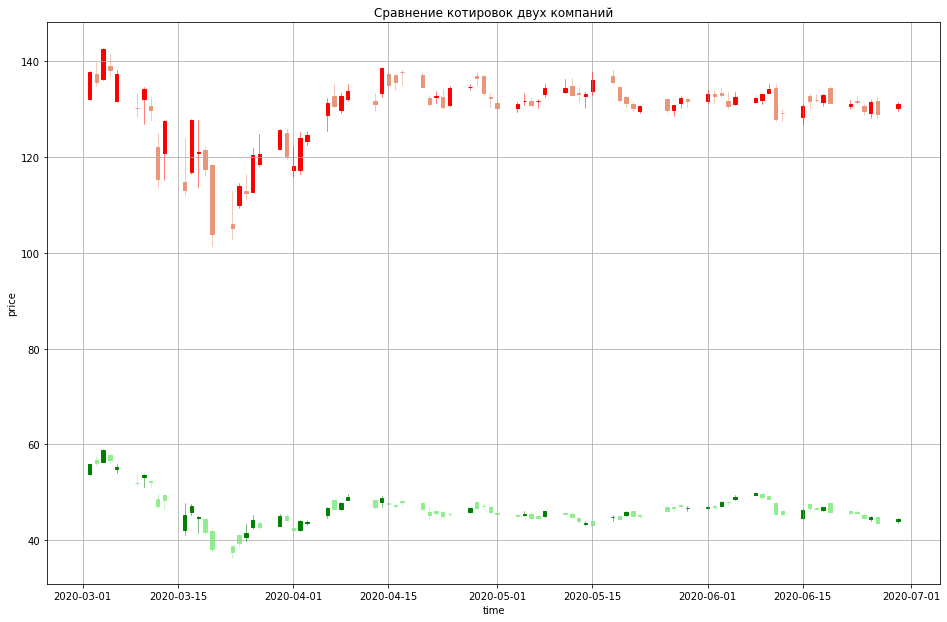

In [21]:
#Строим графики

fig,ax=plt.subplots(facecolor="white",figsize=(16,10))
fig.subplots_adjust(bottom=0.1)
ax.xaxis_date()

plt.title('Сравнение котировок двух компаний')
plt.xlabel('time')
plt.ylabel('price')
candlestick_ohlc(ax,KO.values,width=0.5,colorup='green',colordown='lightgreen') 
candlestick_ohlc(ax,PEP.values,width=0.5,colorup='r',colordown='darksalmon') 
plt.grid(True)